# Regression Problem Formulation

### 1. Goal
The goal of the regression analysis is to build and evaluate a predictive model that estimates a car’s acceleration time using its physical and performance-related attributes.

### 2. Problem Statement
The objective is to predict the time it takes for a car to accelerate from 0 to 60 mph based on measurable attributes such as weight, engine displacement, horsepower, and number of cylinders. <br>
By applying multiple linear regression, we seek to identify which factors most strongly affect acceleration and how these relationships can be quantified.

### 3. Target Variable
- Orginial column: `acceleration`

### 4. Input Features
- `weight`
- `horsepower`
- `displacement`
- `cylinders`

### 5. Hypotheses
- *Null Hypothesis (H₀):* <br>
None of the selected features (weight, horsepower, displacement, and cylinders) significantly influence a car’s acceleration time. <br> All regression coefficients are equal to zero.
- *Alternative Hypothesis (H₁):* <br>
At least one of the selected features significantly influences a car’s acceleration time. <br>
In statistical terms, at least one regression coefficient is not equal to zero.

### 6. Example Input 
```csv
weight, horsepower, displacement, cylinders
3200,130,250,6
```
### 7. Predicted Output 
```csv
10.8 -> Acceleration
```



## The expected approach invovles: 
1. **Data Cleaning and Preparation**
   - Handle missing or non-numeric values  
   - Convert text-based values (e.g., *horsepower*) into numeric format  

2. **Exploratory Data Analysis (EDA)**
   - Use plots and summary statistics to identify correlations and relationships among variables  

3. **Model Design**
   - Build a **Multiple Linear Regression** model  
   - Use **acceleration** as the target variable and select relevant input features  

4. **Model Training and Evaluation**
   - Split the dataset into **training** and **test** sets  
   - Fit the model and evaluate performance using metrics such as:  
     - **Mean Squared Error (MSE)**  
     - **R² Score**  

5. **Model Interpretation**
   - Analyze regression coefficients to determine:  
     - The **direction** (positive or negative)  
     - The **strength** of each feature’s effect on acceleration  

6. **Visualization**
   - Plot **predicted vs. actual acceleration values** to visually assess model accuracy  

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("cars.csv")

# Convert horsepower to numeric (some values may be '?')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['horsepower', 'acceleration', 'weight', 'displacement', 'cylinders'])

# Define features and targets
x = df[['weight', 'horsepower', 'displacement', 'cylinders']]
y = df['acceleration']

# Split into training and test data (80/20) 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

       acceleration       weight  horsepower  displacement   cylinders
count    392.000000   392.000000  392.000000    392.000000  392.000000
mean      15.541327  2977.584184  104.469388    194.411990    5.471939
std        2.758864   849.402560   38.491160    104.644004    1.705783
min        8.000000  1613.000000   46.000000     68.000000    3.000000
25%       13.775000  2225.250000   75.000000    105.000000    4.000000
50%       15.500000  2803.500000   93.500000    151.000000    4.000000
75%       17.025000  3614.750000  126.000000    275.750000    8.000000
max       24.800000  5140.000000  230.000000    455.000000    8.000000
acceleration    1.000000
mpg             0.423329
model year      0.290316
origin          0.212746
weight         -0.416839
cylinders      -0.504683
displacement   -0.543800
horsepower     -0.689196
Name: acceleration, dtype: float64


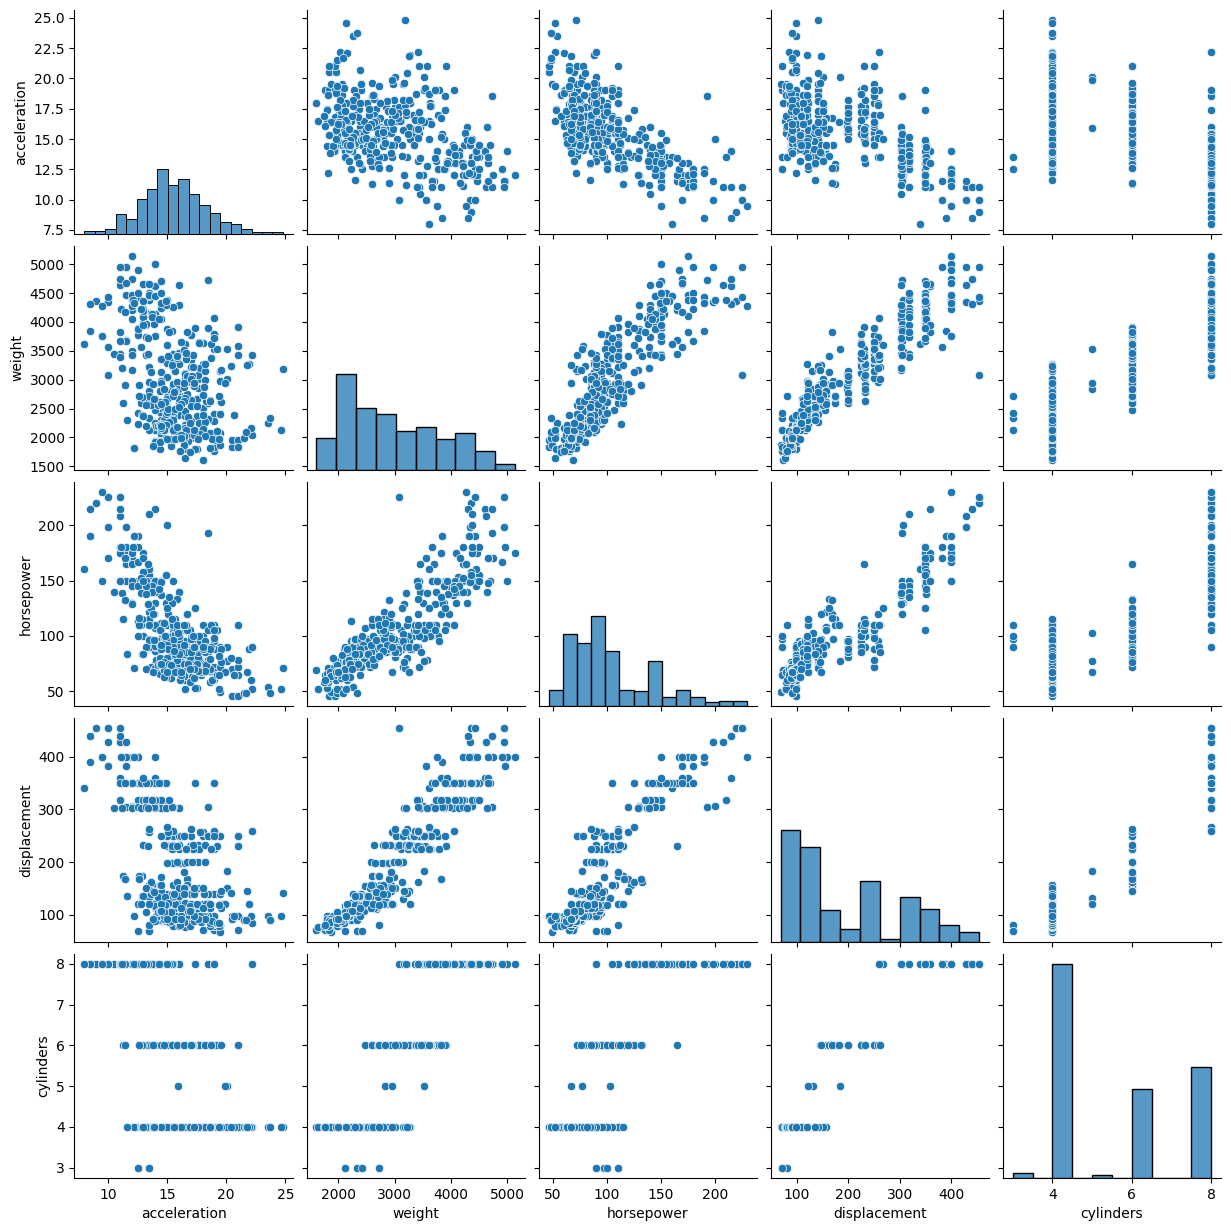

In [8]:
import seaborn as sns

# Summary statistics
print(df[['acceleration', 'weight', 'horsepower', 'displacement', 'cylinders']].describe())

# Correlation matrix
print(df.corr(numeric_only=True)['acceleration'].sort_values(ascending=False))

# Visualization
sns.pairplot(df[['acceleration', 'weight', 'horsepower', 'displacement', 'cylinders']])
plt.show()

In [5]:
# Initialize and train model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

print("Model trained successfully!")
print("Number of coefficients:", len(model.coef_))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Model trained successfully!
Number of coefficients: 4
Intercept: 17.271962626747616
Coefficients: [ 0.00313193 -0.08738941 -0.00807625 -0.06579851]


In [ ]:
# Evaluate performance
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", round(mse, 3))
print("R² Score:", round(r2, 3))

Mean Squared Error: 2.668
R² Score: 0.577


In [9]:
coefficients = pd.DataFrame({
    'Features': x.columns,
    'Coefficients': model.coef_
})
print(coefficients)

       Features  Coefficients
0        weight      0.003132
1    horsepower     -0.087389
2  displacement     -0.008076
3     cylinders     -0.065799


In [10]:
print("Interpretation:")
print("- Positive coefficients = slower acceleration (higher time)")
print("- Negative coefficients = faster acceleration (lower time)")

Interpretation:
- Positive coefficients = slower acceleration (higher time)
- Negative coefficients = faster acceleration (lower time)


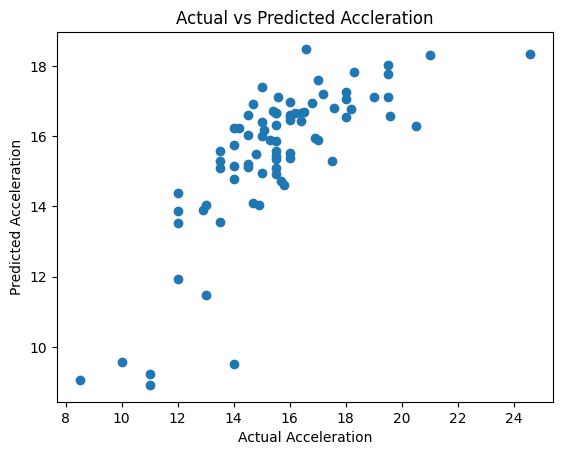

In [7]:
# Scatter plot of actual vs predicted acceleration
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Acceleration")
plt.ylabel("Predicted Acceleration")
plt.title("Actual vs Predicted Accleration")
plt.show()